In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.listdir('data')

['genome-scores.csv',
 'genome-tags.csv',
 'links.csv',
 'movies.csv',
 'ratings.csv',
 'README.txt',
 'tags.csv']

## Genome Scores

In [3]:
genome_scores = pd.read_csv('data/genome-scores.csv')
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [4]:
genome_scores.isna().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [5]:
genome_scores.describe()

,movieId,tagId,relevance
count,1.558445e+07,1.558445e+07,1.558445e+07
mean,4.602249e+04,5.645000e+02,1.163679e-01
std,5.535221e+04,3.256254e+02,1.544722e-01
min,1.000000e+00,1.000000e+00,2.500000e-04
25%,3.853750e+03,2.827500e+02,2.400000e-02
50%,8.575500e+03,5.645000e+02,5.650000e-02
75%,8.018650e+04,8.462500e+02,1.407500e-01
max,2.064990e+05,1.128000e+03,1.000000e+00


## GENOME TAGS

In [6]:
genome_tags = pd.read_csv('data/genome-tags.csv')
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [7]:
genome_tags.isna().sum()

tagId    0
tag      0
dtype: int64

## Links

In [8]:
links = pd.read_csv('data/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
links.isna().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

## Movies

In [10]:
movies = pd.read_csv('data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

## Ratings

In [12]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [13]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [14]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

## Tags

In [15]:
tags = pd.read_csv('data/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [16]:
tags.isna().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [17]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [18]:
tags.describe()

,userId,movieId,timestamp
count,1.093360e+06,1.093360e+06,1.093360e+06
mean,6.759022e+04,5.849276e+04,1.430115e+09
std,5.152114e+04,5.968731e+04,1.177384e+08
min,3.000000e+00,1.000000e+00,1.135429e+09
25%,1.520400e+04,3.504000e+03,1.339262e+09
50%,6.219900e+04,4.594000e+04,1.468929e+09
75%,1.136420e+05,1.029030e+05,1.527402e+09
max,1.625340e+05,2.090630e+05,1.574317e+09


## Merges

In [19]:
os.listdir('data')

['genome-scores.csv',
 'genome-tags.csv',
 'links.csv',
 'movies.csv',
 'ratings.csv',
 'README.txt',
 'tags.csv']

In [20]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [21]:
tags.groupby(['userId', 'movieId'])['tag'].apply(list).reset_index()

,userId,movieId,tag
0,3,260,"[classic, sci-fi]"
1,4,1732,"[dark comedy, great dialogue]"
2,4,7569,[so bad it's good]
3,4,44665,[unreliable narrators]
4,4,115569,[tense]
...,...,...,...
305351,162521,8874,[cornetto triolgy]
305352,162521,51255,[cornetto trilogy]
305353,162521,66934,"[Nathan Fillion, Neil Patrick Harris]"
305354,162521,103341,[cornetto trilogy]


### Ratings

In [22]:
ratings.head(50000).merge(tags.head(50000), on= ['userId', 'movieId'])

,userId,movieId,rating,timestamp_x,tag,timestamp_y
0,3,260,4.0,1439472239,classic,1439472355
1,3,260,4.0,1439472239,sci-fi,1439472256
2,4,1732,4.5,1573943590,dark comedy,1573943598
3,4,1732,4.5,1573943590,great dialogue,1573943604
4,4,7569,3.5,1573943431,so bad it's good,1573943455
...,...,...,...,...,...,...
1144,406,2596,5.0,1477190845,punk,1477190884
1145,406,7265,5.0,1477191434,coming of age,1477191228
1146,406,7265,5.0,1477191434,Incest,1477191237
1147,406,54341,5.0,1477191264,art film,1477191295


In [23]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817


In [24]:
movies = movies.merge(links, on='movieId')

### Movies Analysis


In [25]:
movies.merge(tags.drop(columns='userId'), on='movieId')

,movieId,title,genres,imdbId,tmdbId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,Owned,1515175493
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,imdb top 250,1172144394
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,Pixar,1216146311
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,Pixar,1223304727
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,time travel,1223304729
...,...,...,...,...,...,...,...
1093355,209063,The Prep School Negro (2012),(no genres listed),1462647,509317.0,Philadelphia,1574021180
1093356,209063,The Prep School Negro (2012),(no genres listed),1462647,509317.0,private school,1574021158
1093357,209063,The Prep School Negro (2012),(no genres listed),1462647,509317.0,quaker,1574021197
1093358,209063,The Prep School Negro (2012),(no genres listed),1462647,509317.0,racism,1574021194


## Data Analysis

### Ratings

In [26]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [27]:
ratings.shape

(25000095, 4)

In [28]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


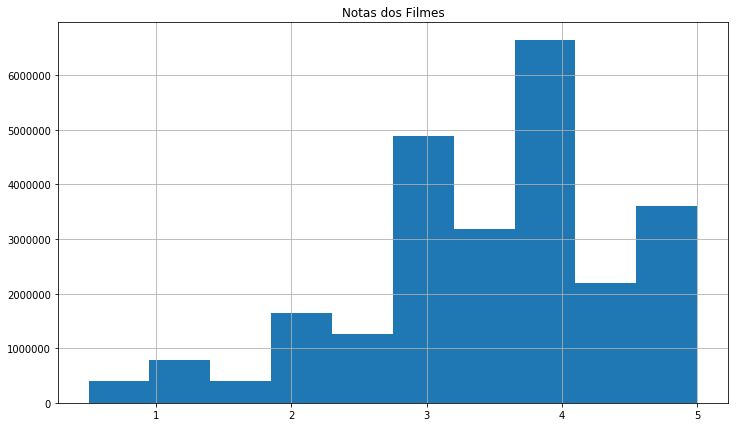

In [29]:
ratings.rating.hist(figsize=(12,7)).set_title('Notas dos Filmes');

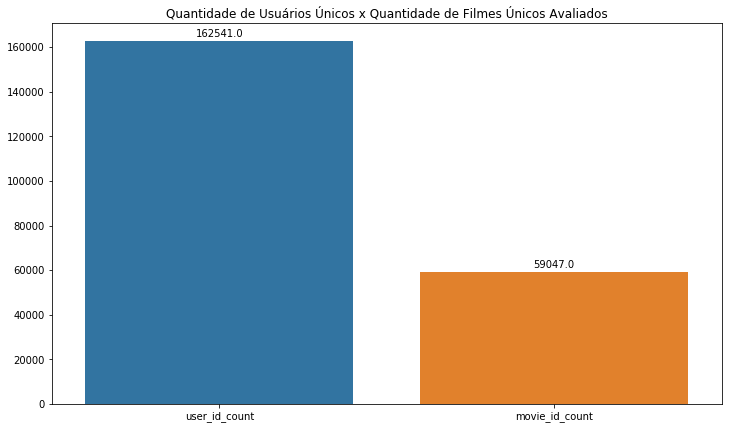

In [68]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x=['user_id_count', 'movie_id_count'], y=[ratings.userId.nunique(), ratings.movieId.nunique()])

for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plots.set_title('Quantidade de Usuários Únicos x Quantidade de Filmes Únicos Avaliados');

In [31]:
user_mean_avaliations = ratings.groupby('userId')['rating'].mean().reset_index(name='mean_rates')

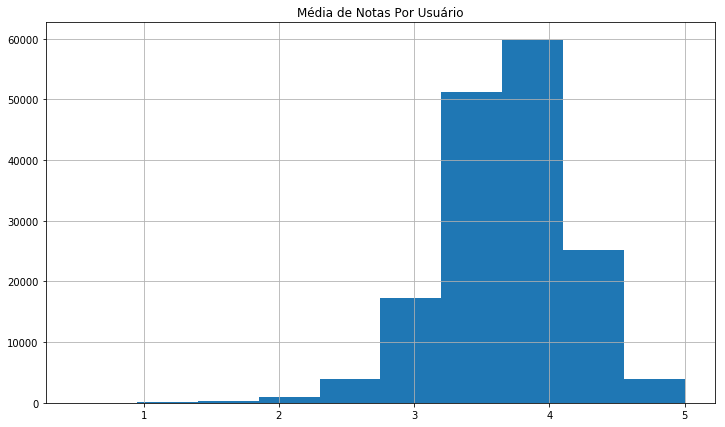

In [32]:
user_mean_avaliations.mean_rates.hist(figsize=(12,7)).set_title("Média de Notas Por Usuário");

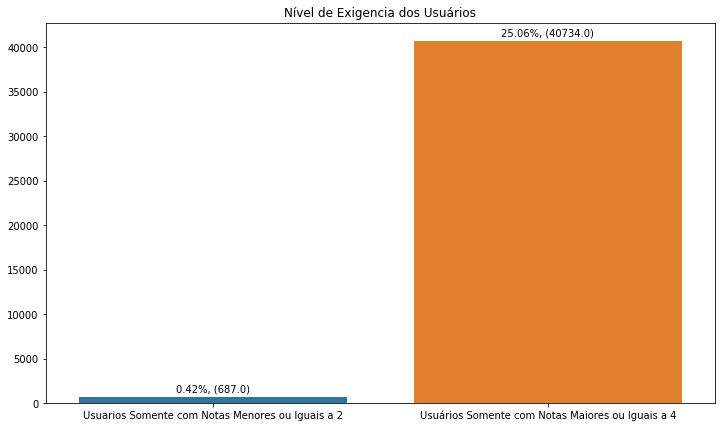

In [70]:
less_than_two = user_mean_avaliations[(user_mean_avaliations['mean_rates'] <= 2)].mean_rates.count()
more_than_four = user_mean_avaliations[(user_mean_avaliations['mean_rates'] >= 4)].mean_rates.count()
plt.figure(figsize=(12, 7))
plots = sns.barplot(x=['Usuarios Somente com Notas Menores ou Iguais a 2', 'Usuários Somente com Notas Maiores ou Iguais a 4'], 
            y=[less_than_two, more_than_four])

for bar in plots.patches:
    plots.annotate(f"{bar.get_height()/ user_mean_avaliations.shape[0] * 100:.2f}%, ({bar.get_height()})",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plots.set_title('Nível de Exigencia dos Usuários');

In [34]:
user_ratings_count = ratings.groupby('userId')['movieId'].count().reset_index(name='ratings_count')
user_ratings_count.describe()

,userId,ratings_count
count,162541.00000,162541.000000
mean,81271.00000,153.807932
std,46921.68939,268.047590
min,1.00000,20.000000
25%,40636.00000,36.000000
50%,81271.00000,71.000000
75%,121906.00000,162.000000
max,162541.00000,32202.000000


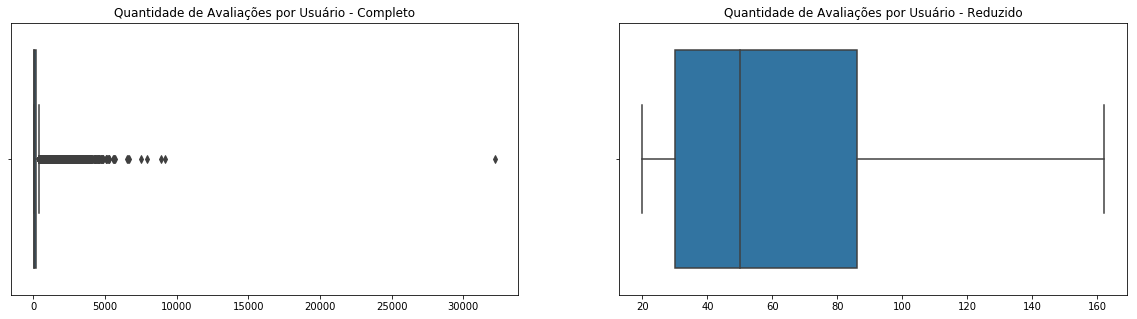

In [87]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.boxplot(user_ratings_count.ratings_count.values, ax=axes[0]).set_title('Quantidade de Avaliações por Usuário - Completo');
sns.boxplot(user_ratings_count[user_ratings_count['ratings_count'] <=162].ratings_count.values, ax=axes[1]).set_title('Quantidade de Avaliações por Usuário - Reduzido');
plt.show()

### Movies

In [36]:
movies.shape

(62423, 5)

In [37]:
movies['genres'].nunique()

1639

In [38]:
movies.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [39]:
movies.genres = movies.genres.apply(lambda x: x.split('|'))

In [40]:
movies['genre_one'] = movies.genres.apply(lambda x: x[0] if len(x) > 0 else 'None')
movies['genre_two'] = movies.genres.apply(lambda x: x[1] if len(x) > 1 else 'None')

In [41]:
movies.head(2)

,movieId,title,genres,imdbId,tmdbId,genre_one,genre_two
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,Adventure,Animation
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",113497,8844.0,Adventure,Children


In [42]:
movies_with_rate = movies.merge(ratings, on='movieId')

In [43]:
movies_with_rate.head(3)

,movieId,title,genres,imdbId,tmdbId,genre_one,genre_two,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,Adventure,Animation,2,3.5,1141415820
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,Adventure,Animation,3,4.0,1439472215
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,Adventure,Animation,4,3.0,1573944252


In [44]:
movies_with_rate.drop(columns=['genres', 'imdbId', 'tmdbId', 'timestamp'], inplace=True)

In [45]:
movies_with_rate.head(2)

,movieId,title,genre_one,genre_two,userId,rating
0,1,Toy Story (1995),Adventure,Animation,2,3.5
1,1,Toy Story (1995),Adventure,Animation,3,4.0


In [92]:
movies_rate_count = movies_with_rate.groupby('title')['rating'].apply(len).reset_index(name='rate_count')

In [93]:
movies_rate_count.describe()

,rate_count
count,58958.000000
mean,424.032277
std,2479.744597
min,1.000000
25%,2.000000
50%,6.000000
75%,36.750000
max,81491.000000


In [47]:
monogenre = movies_with_rate[movies_with_rate['genre_two'] == 'None']

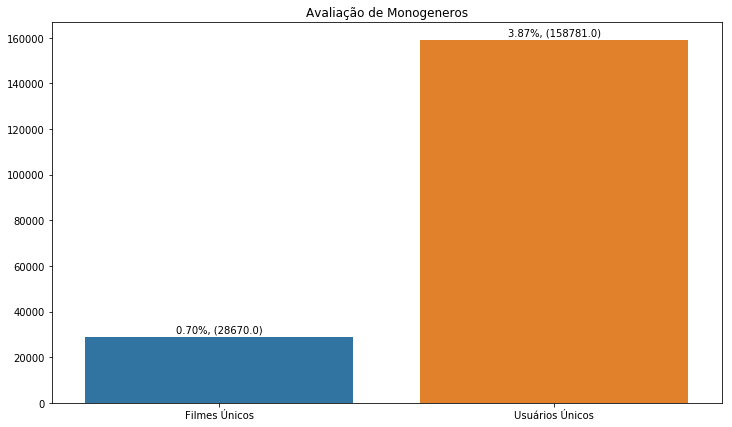

In [48]:
plt.figure(figsize=(12,7))
plots = sns.barplot(x=['Filmes Únicos', 'Usuários Únicos'], 
            y=[monogenre.movieId.nunique(), monogenre.userId.nunique()])

for bar in plots.patches:
    plots.annotate(f"{bar.get_height()/ monogenre.shape[0] * 100:.2f}%, ({bar.get_height()})",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plots.set_title("Avaliação de Monogeneros");

In [49]:
monogenre_exclusive = monogenre.drop_duplicates(subset=['genre_one', 'userId'], keep='first')

In [50]:
monogenre_exclusive_usersgenre = monogenre_exclusive.groupby('genre_one')['userId'].count().reset_index(name='users_count')

In [51]:
monogenre_exclusive_usersgenre = monogenre_exclusive_usersgenre.sort_values(by='users_count', ascending=True)

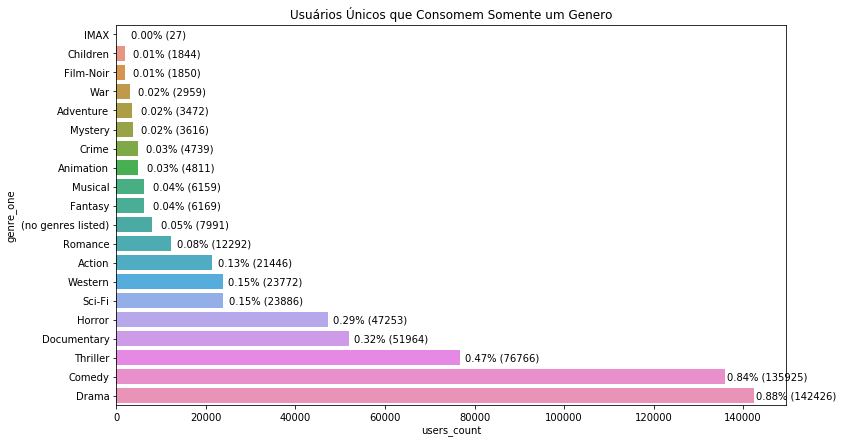

In [110]:
plt.figure(figsize=(12,7))
plots = sns.barplot(data=monogenre_exclusive_usersgenre, 
                    y=monogenre_exclusive_usersgenre.genre_one, 
                    x=monogenre_exclusive_usersgenre.users_count, orient='h')
    
for p in plots.patches:
    width = p.get_width()
    plt.text(p.get_width()+9500, p.get_y()+0.55*p.get_height(),
             '{:.2f}% ({})'.format(width/ratings.userId.nunique(), int(width)),
             ha='center', va='center')
    
plots.set_title("Usuários Únicos que Consomem Somente um Genero");

In [53]:
monogenre_exclusive_meanrate = monogenre_exclusive.groupby('genre_one')['rating'].mean().reset_index(name='meanrate')
monogenre_exclusive_meanrate = monogenre_exclusive_meanrate.sort_values(by='meanrate', ascending=True)

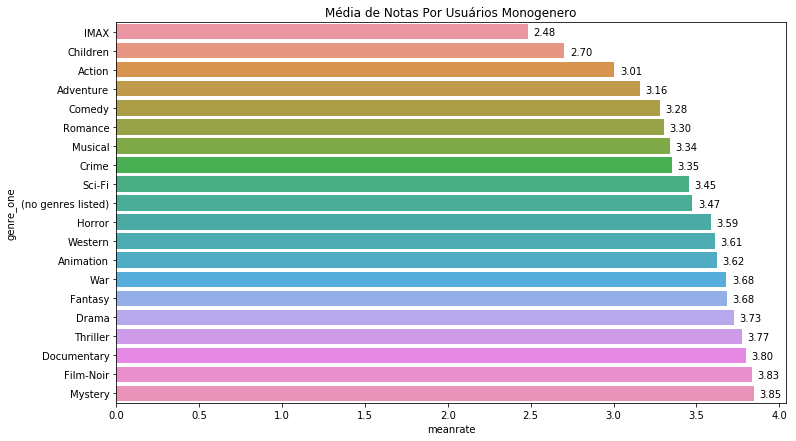

In [55]:
plt.figure(figsize=(12,7))
plots = sns.barplot(data=monogenre_exclusive_meanrate, 
                    y=monogenre_exclusive_meanrate.genre_one, 
                    x=monogenre_exclusive_meanrate.meanrate, orient='h')
    
for p in plots.patches:
    width = p.get_width()
    plt.text(p.get_width() + .1, p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
    
plots.set_title("Média de Notas Por Usuários Monogenero");

### Setting up the CB dataset

In [57]:
movies.drop(columns=['imdbId', 'tmdbId', 'genre_one', 'genre_two'], inplace=True)

In [59]:
movies = movies.explode('genres')

In [111]:
movies.head(7)

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children


In [115]:
colum = ['MovieId','Animation','Children','Comedy','Adventure','Fantasy','Romance','Drama','Action','Crime','Thriller','Horror','Sci-Fi','Documentary','War','Musical','Mystery','Film-Noir','Western']
values = [[1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
[3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]]

In [119]:
pd.DataFrame(values, columns=colum)

,MovieId,Animation,Children,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Split Train and Test